# **Pokemon Dataset**

## Contexte
Images de tous les Pokémons de la génération 1 à la génération 7, avec leurs types (primaire et secondaire) en csv.



## Inspiration- Data analysis and visualization
Analyser les différents types de Pokémons, en particulier en quel type ils évoluent, le pourcentage de types spéciaux

Fusionner des informations pertinentes dans un dataframe telles que les déplacements, la génération, les types forts/faibles, etc. et utiliser les images pour les classer.



## Travaux futurs/Idées : Prédire les types primaires et secondaires de Pokémon à partir des images. Identifier quels types de formulaires d'évolution la forme d'évolution aura en fonction des formulaires pré-évolués. Par exemple, de Pichu et Pikachu prédisent pour Raichu.


## Source
data scrappée depuis https://pokemondb.net/pokedex/national


# ***Importation des librairies***

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
#import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud



In [0]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ls "/content/drive/My Drive/PokemonViz"

images/  pokemon1.csv  pokemon2.csv  PokemonViz.ipynb


## Charger les fichiers CSV

In [0]:

#importation fichier csv et lecture
pokemon1 = pd.read_csv("/content/drive/My Drive/PokemonViz/pokemon1.csv", index_col=None)

pokemon2 = pd.read_csv("/content/drive/My Drive/PokemonViz/pokemon2.csv", index_col=None)


#df = pd.read_csv()

In [0]:
pokemon1.head(10)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
5,charizard,Fire,Flying
6,squirtle,Water,NaN
7,wartortle,Water,NaN
8,blastoise,Water,NaN
9,caterpie,Bug,NaN


In [0]:
pokemon2.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50.0,10,20,20,45,bug,NaN,2.9,1,0


# Le merge du fichier csv  et de la galerie de photos pour associer chaque nom de Pokemon à son image

In [0]:
#le merge du fichier csv  et de la galerie de photos pour associer chaque nom de Pokemon à son image


portrait = pd.merge(images, pokemon1['name'], on='id', how='left')


portrait.info()

NameError: ignored

# Comparer le nombre d'espèce de Pokemon par catégorie


Text(0.5, 0, "Nombre d'espèces")

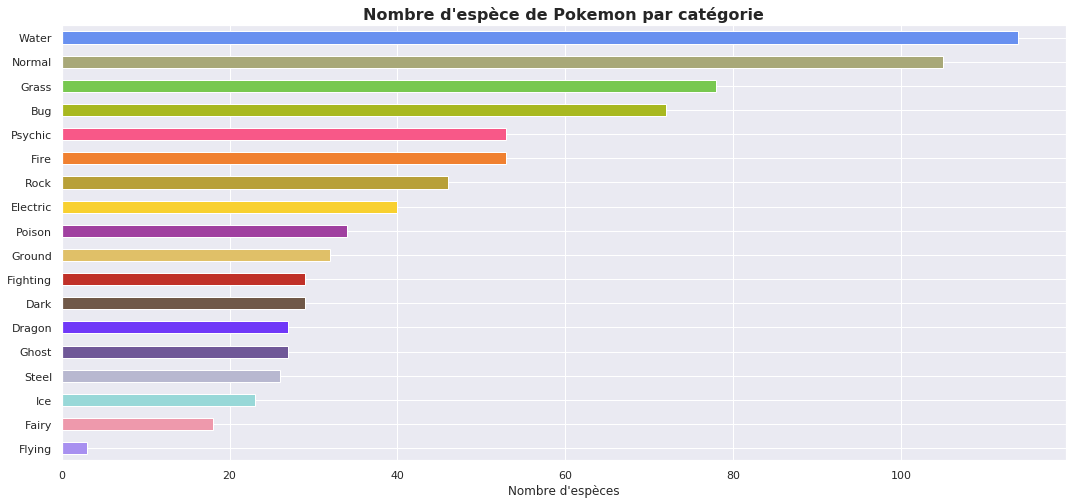

In [0]:
pk_colors = ['#A8B820',  # Bug,
             '#705848',  # Dark,
             '#7038F8',  # Dragon
             '#F8D030',  # Electric
             '#EE99AC',  # Fairy
             '#C03028',  # Fighting
             '#F08030',  # Fire
             '#A890F0',  # Flying
             '#705898',  # Ghost                    
             '#78C850',  # Grass
             '#E0C068',  # Ground
             '#98D8D8',  # Ice
             '#A8A878',  # Normal
             '#A040A0',  # Poison
             '#F85888',  # Psychic
             '#B8A038',  # Rock
             '#B8B8D0',  # Steel
             '#6890F0',  # Water
             ]
pkt_cnt = pokemon1["Type1"].value_counts(sort=False).sort_index()
pkt_cnt = pd.concat([pkt_cnt, pd.DataFrame(pk_colors,
                                           index=pkt_cnt.index,
                                           columns=["Colors"])], axis=1)
pkt_cnt.sort_values("Type1", inplace=True)
pkt_cnt_bar = pkt_cnt.plot(kind='barh', y="Type1", color=pkt_cnt.Colors,
                           legend=False, figsize=(18, 8))
pkt_cnt_bar.set_title("Nombre d'espèce de Pokemon par catégorie",
                      fontsize=16, weight="bold")
pkt_cnt_bar.set_xlabel("Nombre d'espèces")


NameError: ignored

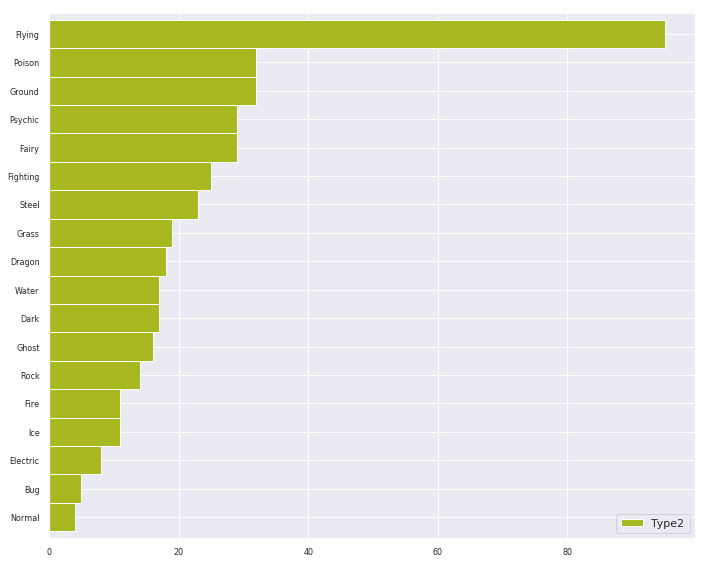

In [0]:
pk_colors = ['#A8B820',  # Bug,
             '#705848',  # Dark,
             '#7038F8',  # Dragon
             '#F8D030',  # Electric
             '#EE99AC',  # Fairy
             '#C03028',  # Fighting
             '#F08030',  # Fire
             '#A890F0',  # Flying
             '#705898',  # Ghost                    
             '#78C850',  # Grass
             '#E0C068',  # Ground
             '#98D8D8',  # Ice
             '#A8A878',  # Normal
             '#A040A0',  # Poison
             '#F85888',  # Psychic
             '#B8A038',  # Rock
             '#B8B8D0',  # Steel
             '#6890F0',  # Water
             ]


pk = pokemon1["Type2"].value_counts(sort=False).sort_index()
pk= pd.concat([pk, pd.DataFrame(pk_colors,index=pk.index)], axis=1)
pk.sort_values("Type2", inplace=True)


fig, ax = plt.subplots(figsize=(10, 8))
pk.plot.barh(ax=ax, fontsize=8, width=1, color=pk_colors)
plt.tight_layout()




pk_bar.title("Type d'attaque associée aux espèces de Pokemons existants",
                  fontsize=16, weight="bold")
pk_bar.set_xlabel("Nombre d'espèces")

pk_bar.set_ylabel("Type d'attaque (pouvoir)")


## Colonnes pour mieux comprendre les types de Pokemons

In [0]:
colonne_cible= ["name","abilities","classfication",'type1','type2',"is_legendary",]

df1 = pokemon2[colonne_cible]

df1.head()


,name,abilities,classfication,type1,type2,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,0
3,Charmander,"['Blaze', 'Solar Power']",Lizard Pokémon,fire,NaN,0
4,Charmeleon,"['Blaze', 'Solar Power']",Flame Pokémon,fire,NaN,0


## Quelques informations quantitatives sur les Pokemons

In [0]:
pkt = pokemon2.pivot_table(index="name",
                          values=["generation","defense","percentage_male","weight_kg","speed"],
                          aggfunc='mean')
pkt.head(10)

,defense,generation,percentage_male,speed,weight_kg
name,,,,,
Abomasnow,105,4,50.0,30,135.5
Abra,15,1,75.4,90,19.5
Absol,60,3,50.0,115,47.0
Accelgor,40,5,50.0,145,25.3
Aegislash,50,6,50.0,60,53.0
Aerodactyl,85,1,88.1,150,59.0
Aggron,230,3,50.0,50,360.0
Aipom,55,2,50.0,85,11.5
Alakazam,65,1,75.4,150,48.0


# Tableau des colonnes pertinentes

In [0]:
colonne_cible2=["name","generation","defense","percentage_male","weight_kg","speed","abilities","classfication","capture_rate",'type1','type2',"is_legendary",]

df2 = pokemon2[colonne_cible2]

df2.head()


,name,generation,defense,percentage_male,weight_kg,speed,abilities,classfication,capture_rate,type1,type2,is_legendary
0,Bulbasaur,1,49,88.1,6.9,45,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,grass,poison,0
1,Ivysaur,1,63,88.1,13.0,60,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,grass,poison,0
2,Venusaur,1,123,88.1,100.0,80,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,grass,poison,0
3,Charmander,1,43,88.1,8.5,65,"['Blaze', 'Solar Power']",Lizard Pokémon,45,fire,NaN,0
4,Charmeleon,1,58,88.1,19.0,80,"['Blaze', 'Solar Power']",Flame Pokémon,45,fire,NaN,0


# Les Pokemons légendaires: pourcentage

In [0]:
pkl = pokemon2.pivot_table(index="type1",
                          values=["is_legendary"],
                          aggfunc="sum")
#pkl.sort_index()
pkl.is_legendary = pkl.is_legendary.astype(int)
pkl["Total"] = pokemon2["type1"].value_counts()
pkl["Simple_pokemon"] = pkl.Total - pkl.is_legendary
pkl["Ratio"] = pokemon2.pivot_table(index="type1",
                                   values=["is_legendary"],
                                   aggfunc="mean")
pkl["Pourcentage"] = pkl["Ratio"] * 100
pkl["Couleur"] = pk_colors
pkl.head()


,is_legendary,Total,Simple_pokemon,Ratio,Pourcentage,Couleur
type1,,,,,,
bug,3,72,69,0.041667,4.166667,#A8B820
dark,3,29,26,0.103448,10.344828,#705848
dragon,7,27,20,0.259259,25.925926,#7038F8
electric,5,39,34,0.128205,12.820513,#F8D030
fairy,1,18,17,0.055556,5.555556,#EE99AC


# Proportion des Pokemons légendaires dans la population totale Pokemon.

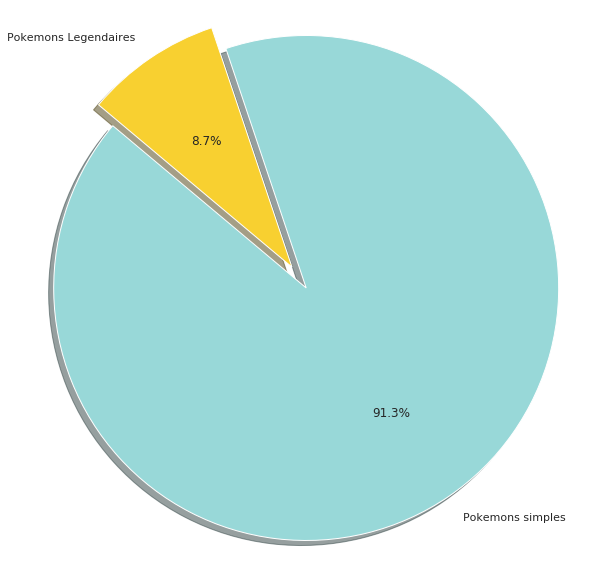

Text(0.5, 1.0, 'Proportion de Pokemons légendaires')

In [0]:

labels2='Pokemons simples','Pokemons Legendaires'
explode2=(0,0.1)
plt.pie(pokemon2.is_legendary.value_counts(),labels= labels2, explode=explode2, shadow=True, startangle=140, colors=('#98D8D8','#F8D030'),autopct='%1.1f%%')
plt.gcf().set_size_inches(10,10)

plt.axis('equal')
plt.show()

ax.set_title("Proportion de Pokemons légendaires",
             fontsize=16, weight="bold")


# Tableau de tous les Pokemons légendaires par type 

## Exclusion des lignes sans pokemons légendaires

In [0]:
# Exclusion des lignes sans pokemons légendaires
pkl_notnull = pkl[pkl.is_legendary != 0]
pkl_notnull.head(10)

,is_legendary,Total,Simple_pokemon,Ratio,Pourcentage,Couleur
type1,,,,,,
bug,3,72,69,0.041667,4.166667,#A8B820
dark,3,29,26,0.103448,10.344828,#705848
dragon,7,27,20,0.259259,25.925926,#7038F8
electric,5,39,34,0.128205,12.820513,#F8D030
fairy,1,18,17,0.055556,5.555556,#EE99AC
fire,5,52,47,0.096154,9.615385,#F08030
flying,1,3,2,0.333333,33.333333,#A890F0
ghost,1,27,26,0.037037,3.703704,#705898
grass,4,78,74,0.051282,5.128205,#78C850


# Proportion de Pokemons legendaires par type de Pokemon

Text(0.5, 1.0, 'Proportion de Pokemon legendaires par type de Pokemon')

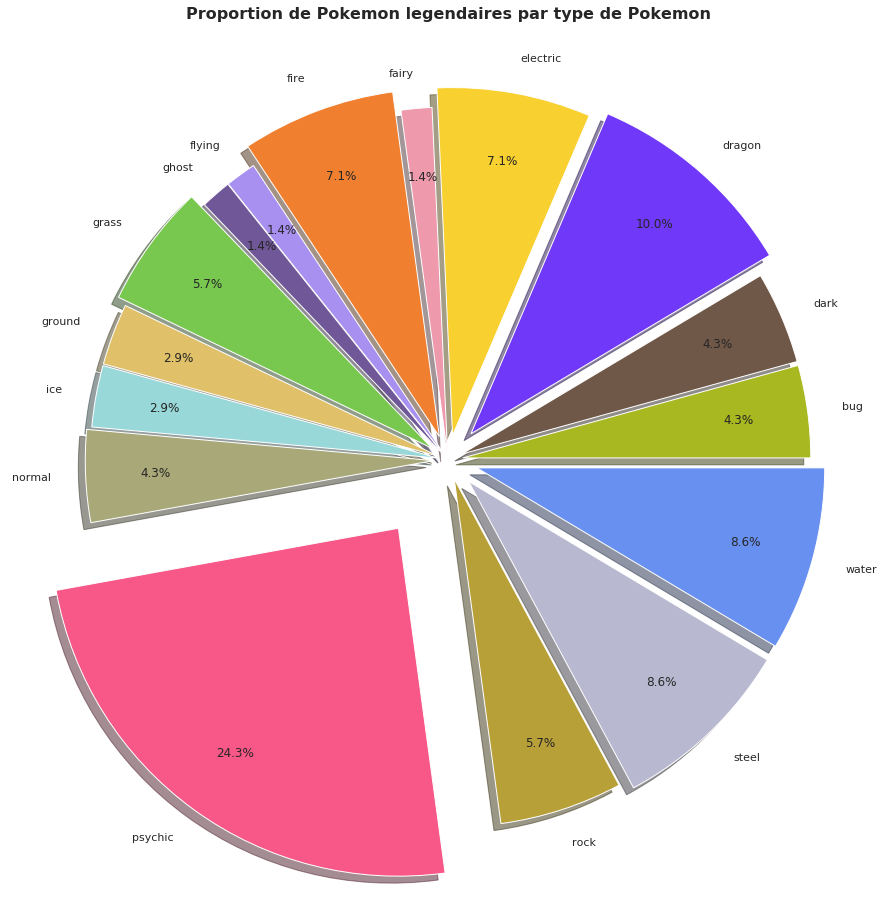

In [0]:
l_total = sum(pkl_notnull.is_legendary)
ax = pkl_notnull.is_legendary.plot(kind="pie", label="",
                                colors=pkl_notnull.Couleur,shadow=True,
                                autopct='%.1f%%', pctdistance=0.8,
                                explode=pkl_notnull.is_legendary / l_total,
                                figsize=(18, 16))
ax.set_title("Proportion de Pokemon legendaires par type de Pokemon",
             fontsize=16, weight="bold")



# Déterminer le pourcentage de Pokemon légendaire feminin

### Difference entre colonne 'percentage_male' et 100%, afin determiner le pourcentage de femelle Pokemon par espece (name) et creer une colonne "percentage_female".

In [0]:

pokemon2['percentage_female'] = 100-pokemon2.percentage_male

pokemon2.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,11.9
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0,11.9
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0,11.9
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0,11.9
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0,11.9


## Merge du df2 et de la colonne 'pourcentage femelles'

In [0]:
#pokemon3 = pokemon2['name'] + pokemon2['percentage_female']
pokemon3 = pokemon2[['name', 'percentage_female']].copy()
pokemon3.head()

#pd.merge(colonne_cible2, bdf, how='left', on='x1')

,name,percentage_female
0,Bulbasaur,11.9
1,Ivysaur,11.9
2,Venusaur,11.9
3,Charmander,11.9
4,Charmeleon,11.9


In [0]:
pokemon4 = pd.merge(pokemon3, df2, on = ['name'])
pokemon4.head(10)

,name,percentage_female,generation,defense,percentage_male,weight_kg,speed,abilities,classfication,capture_rate,type1,type2,is_legendary
0,Bulbasaur,11.9,1,49,88.1,6.9,45,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,grass,poison,0
1,Ivysaur,11.9,1,63,88.1,13.0,60,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,grass,poison,0
2,Venusaur,11.9,1,123,88.1,100.0,80,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,grass,poison,0
3,Charmander,11.9,1,43,88.1,8.5,65,"['Blaze', 'Solar Power']",Lizard Pokémon,45,fire,NaN,0
4,Charmeleon,11.9,1,58,88.1,19.0,80,"['Blaze', 'Solar Power']",Flame Pokémon,45,fire,NaN,0
5,Charizard,11.9,1,78,88.1,90.5,100,"['Blaze', 'Solar Power']",Flame Pokémon,45,fire,flying,0
6,Squirtle,11.9,1,65,88.1,9.0,43,"['Torrent', 'Rain Dish']",Tiny Turtle Pokémon,45,water,NaN,0
7,Wartortle,11.9,1,80,88.1,22.5,58,"['Torrent', 'Rain Dish']",Turtle Pokémon,45,water,NaN,0
8,Blastoise,11.9,1,120,88.1,85.5,78,"['Torrent', 'Rain Dish']",Shellfish Pokémon,45,water,NaN,0
9,Caterpie,50.0,1,35,50.0,2.9,45,"['Shield Dust', 'Run Away']",Worm Pokémon,255,bug,NaN,0


## Placer la colonne 'pourcentage femelles' à côté de la colonne 'pourcentage mâles':

In [0]:
pokemon4 = pokemon4[['name','percentage_male','percentage_female','generation', 'defense', 'weight_kg',	'speed', 'abilities']]
pokemon4.head(10)

#df = df[['mean', 4,3,2,1]]

,name,percentage_male,percentage_female,generation,defense,weight_kg,speed,abilities
0,Bulbasaur,88.1,11.9,1,49,6.9,45,"['Overgrow', 'Chlorophyll']"
1,Ivysaur,88.1,11.9,1,63,13.0,60,"['Overgrow', 'Chlorophyll']"
2,Venusaur,88.1,11.9,1,123,100.0,80,"['Overgrow', 'Chlorophyll']"
3,Charmander,88.1,11.9,1,43,8.5,65,"['Blaze', 'Solar Power']"
4,Charmeleon,88.1,11.9,1,58,19.0,80,"['Blaze', 'Solar Power']"
5,Charizard,88.1,11.9,1,78,90.5,100,"['Blaze', 'Solar Power']"
6,Squirtle,88.1,11.9,1,65,9.0,43,"['Torrent', 'Rain Dish']"
7,Wartortle,88.1,11.9,1,80,22.5,58,"['Torrent', 'Rain Dish']"
8,Blastoise,88.1,11.9,1,120,85.5,78,"['Torrent', 'Rain Dish']"
9,Caterpie,50.0,50.0,1,35,2.9,45,"['Shield Dust', 'Run Away']"


## Merge colonnes pourcentage mâle et femelle avec colonne 'is_legendary'

In [0]:
pokemon5 = pd.merge(pokemon4, pkl_notnull)

In [0]:
#pokemon5 = pd.merge(pokemon4, pkl_notnull)
pokemon5.head()

,name,percentage_female,generation,defense,percentage_male,weight_kg,speed,abilities,classfication,capture_rate,type1,type2,is_legendary,Total,Simple_pokemon,Ratio,Pourcentage,Couleur
0,Articuno,NaN,1,100,NaN,55.4,85,"['Pressure', 'Snow Cloak']",Freeze Pokémon,3,ice,flying,1,18,17,0.055556,5.555556,#EE99AC
1,Articuno,NaN,1,100,NaN,55.4,85,"['Pressure', 'Snow Cloak']",Freeze Pokémon,3,ice,flying,1,3,2,0.333333,33.333333,#A890F0
2,Articuno,NaN,1,100,NaN,55.4,85,"['Pressure', 'Snow Cloak']",Freeze Pokémon,3,ice,flying,1,27,26,0.037037,3.703704,#705898
3,Zapdos,NaN,1,85,NaN,52.6,100,"['Pressure', 'Static']",Electric Pokémon,3,electric,flying,1,18,17,0.055556,5.555556,#EE99AC
4,Zapdos,NaN,1,85,NaN,52.6,100,"['Pressure', 'Static']",Electric Pokémon,3,electric,flying,1,3,2,0.333333,33.333333,#A890F0


In [0]:
pokemon6 = pokemon5[pokemon5.percentage_male != ]
pokemon6.head(10)

NameError: ignored

In [0]:
labels2='Pokemons mâles','Pokemons femelles'
explode2=(0,0.1)
plt.pie(pokemon.percentage_female.value_counts(),labels=labels2, explode=explode2, shadow=True, startangle=140, colors=('#98D8D8','#F8D030'),autopct='%1.1f%%')
plt.gcf().set_size_inches(10,10)

plt.axis('equal')
plt.show()

ax.set_title("Proportion de Pokemons mâles et femelles",
             fontsize=16, weight="bold")



NameError: ignored

ValueError: ignored

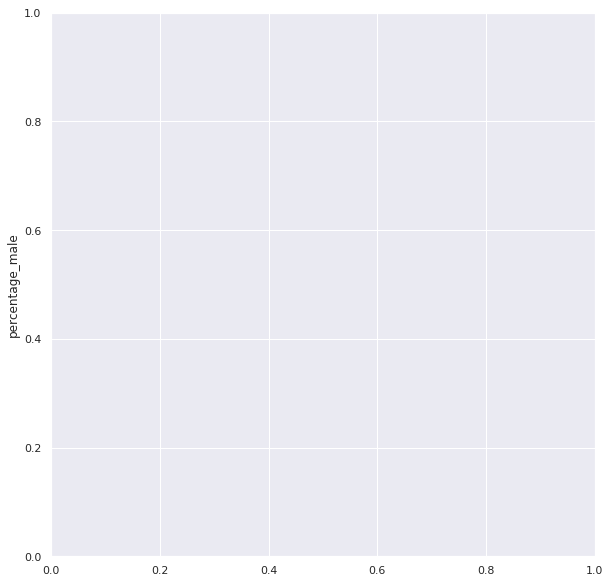

In [0]:
labels2='Pokemons mâles','Pokemons femelles'
explode2=(0,0.1)
ax = pokemon2.percentage_male.value_counts().plot.pie(autopct='%.1f %%',labels=labels2, explode=explode2, shadow=True, startangle=140, colors=('#98D8D8','#F8D030'))
plt.gcf().set_size_inches(10,10)
ax.set_title('Proportion of male and female Pokemons',
             fontsize=16, weight="bold")

plt.axis('equal')
plt.show()

ValueError: ignored

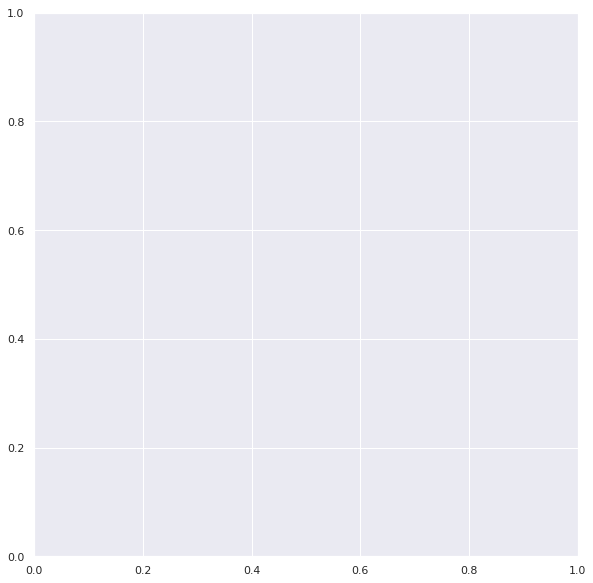

In [0]:

labels2='Pokemons simples','Pokemons Legendaires'
explode2=(0,0.1)
plt.pie(pokemon2.percentage_male.value_counts(),labels= labels2, explode=explode2, shadow=True, startangle=140, colors=('#98D8D8','#F8D030'),autopct='%1.1f%%')
plt.gcf().set_size_inches(10,10)

plt.axis('equal')
plt.show()

ax.set_title("Proportion de Pokemons légendaires",
             fontsize=16, weight="bold")

Text(0.5, 1.0, 'Proportion of male and female Pokemons')

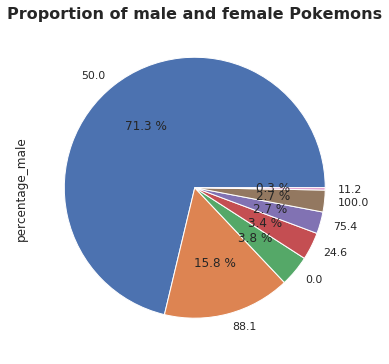

In [0]:
ax = pokemon2.percentage_male.value_counts().plot.pie(#startangle=45,
                                               autopct='%.1f %%',
                                               figsize=(18, 6))
ax.set_title('Proportion of male and female Pokemons',
             fontsize=16, weight="bold")

In [0]:
cols = ["Legendary", "Other"]
fig, axes = plt.subplots(6, 3, figsize=(10, 10))
for i, idx in enumerate(pkl.index):
    ax = axes[i // 3, i % 3]
    ax.pie(pkl[cols].T[idx], labels=cols,
           startangle=30, autopct='%.1f %%')
    ax.set_title(idx, fontdict={"size":"large",
                                "weight":"bold"})

fig.subplots_adjust(wspace=.5, hspace=.5)
plt.suptitle("Proportion of Legendary for each Pokemon Type",
             fontsize=16, weight="bold")
Text(0.5,0.98,'Proportion of Legendary for each Pokemon Type')


In [0]:
pkl_notnull = pkl[pkl.Legendary != 0]
pkl_notnull.head()

KeyError: ignored

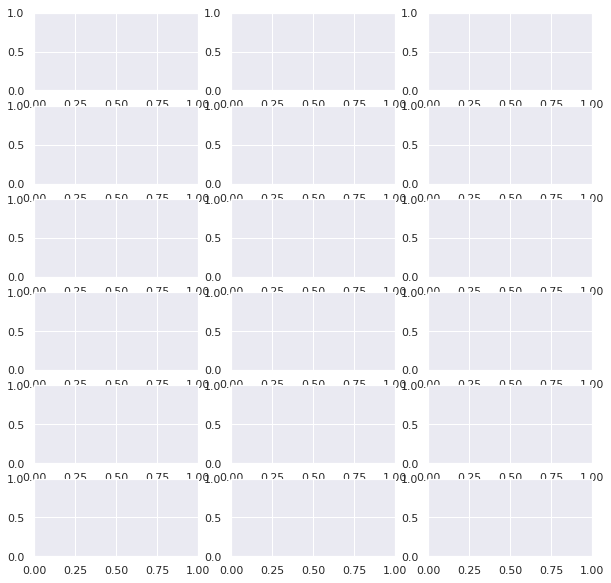

In [0]:
percentage_gender = pokemon4.pivot_table(index= 'name', values=["percentage_male"], aggfunc="sum")


cols = ["percentage_male", "percentage_female"]
fig, axes = plt.subplots(6, 3, figsize=(10, 10))
for i, idx in enumerate(percentage_gender.index):
    ax = axes[i // 3, i % 3]
    ax.pie(percentage_gender[cols].T[idx], labels=cols,
           startangle=30, autopct='%.1f %%')
    ax.set_title(idx, fontdict={"size":"large",
                                "weight":"bold"})

fig.subplots_adjust(wspace=.5, hspace=.5)
plt.suptitle("Proportion of Legendary for each Pokemon Type",
             fontsize=16, weight="bold")
Text(0.5,0.98,'Proportion of Legendary for each Pokemon Type')
